# Apartment_Benchmark_SA

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
file_path = '../../data/processed/Imputed_Final_Merged_Canada_Dataset.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df['All industries GDP'] = df['All industries GDP'].replace({',': ''}, regex=True).astype(float)
df.fillna(df.mean(numeric_only=True), inplace=True)
scaler = StandardScaler()
X = df.drop(columns=['Single_Family_Benchmark_SA', 'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'Date'])
X_scaled = scaler.fit_transform(X)
y_apartment = df['Apartment_Benchmark_SA']
X_train_ap, X_test_ap, y_train_ap, y_test_ap = train_test_split(X_scaled, y_apartment, test_size=0.2, random_state=42)

# Function to build and evaluate a linear regression model
def build_and_evaluate_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Function to build and evaluate a Random Forest model
def build_and_evaluate_rf(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Function to build and evaluate a Decision Tree model
def build_and_evaluate_dt(X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Function to build a neural network model
def build_nn_model(input_shape):
    model = Sequential([
        Dense(64, input_dim=input_shape, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Evaluate Multiple Linear Regression for 'Apartment_Benchmark_SA'
mse_ap, r2_ap = build_and_evaluate_linear_regression(X_train_ap, X_test_ap, y_train_ap, y_test_ap)
print(f'Apartment Benchmark SA - MSE: {mse_ap}, R2: {r2_ap}')

# Evaluate Random Forest Regressor for 'Apartment_Benchmark_SA'
mse_ap_rf, r2_ap_rf = build_and_evaluate_rf(X_train_ap, X_test_ap, y_train_ap, y_test_ap)
print(f'Apartment Benchmark SA - Random Forest MSE: {mse_ap_rf}, R2: {r2_ap_rf}')

# Evaluate Decision Tree Regressor for 'Apartment_Benchmark_SA'
mse_ap_dt, r2_ap_dt = build_and_evaluate_dt(X_train_ap, X_test_ap, y_train_ap, y_test_ap)
print(f'Apartment Benchmark SA - Decision Tree MSE: {mse_ap_dt}, R2: {r2_ap_dt}')

# Build and train neural network model for 'Apartment_Benchmark_SA'
nn_model_ap = build_nn_model(X_train_ap.shape[1])
nn_model_ap.fit(X_train_ap, y_train_ap, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
loss_ap, mae_ap = nn_model_ap.evaluate(X_test_ap, y_test_ap, verbose=0)
print(f'Apartment Benchmark SA - Neural Network MAE: {mae_ap}')


Apartment Benchmark SA - MSE: 3903.933903759203, R2: 0.9999997079093007
Apartment Benchmark SA - Random Forest MSE: 19762973.04255319, R2: 0.9985213426360277
Apartment Benchmark SA - Decision Tree MSE: 30244042.55319149, R2: 0.9977371534059538


c:\Users\peach\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Apartment Benchmark SA - Neural Network MAE: 261108.6875


# Model Performance Comparison

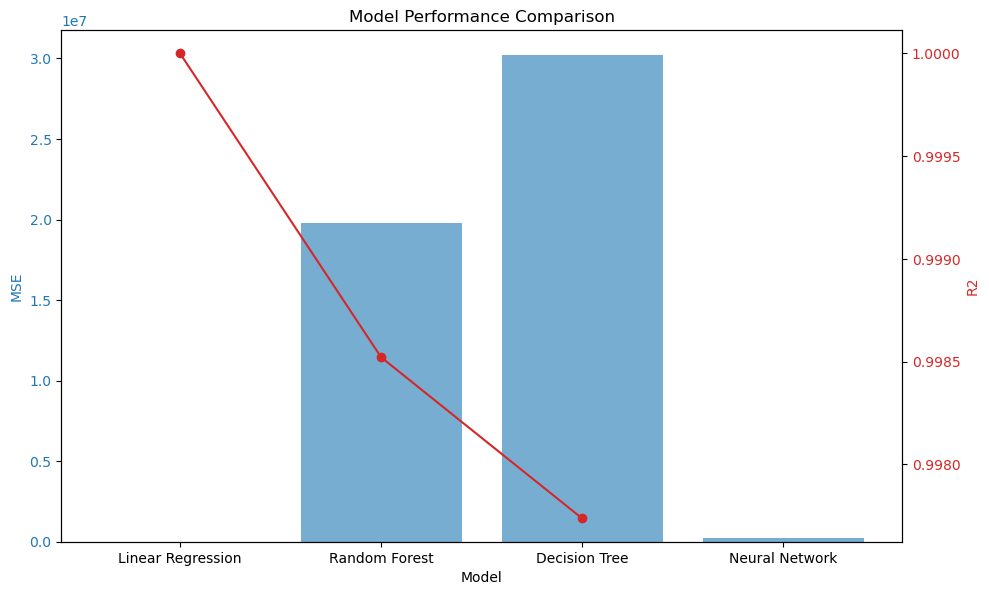

In [3]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Neural Network']
mse_scores = [mse_ap, mse_ap_rf, mse_ap_dt, mae_ap]  # Neural Network uses MAE for error measurement
r2_scores = [r2_ap, r2_ap_rf, r2_ap_dt, None]  # Neural Network does not provide R2 directly

# Plotting MSE and R2
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color=color)
ax1.bar(models, mse_scores, color=color, alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('R2', color=color)  # we already handled the x-label with ax1
ax2.plot(models[:-1], r2_scores[:-1], color=color, marker='o', label='R2')  # No R2 for Neural Network
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model Performance Comparison')
plt.show()


c:\Users\peach\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


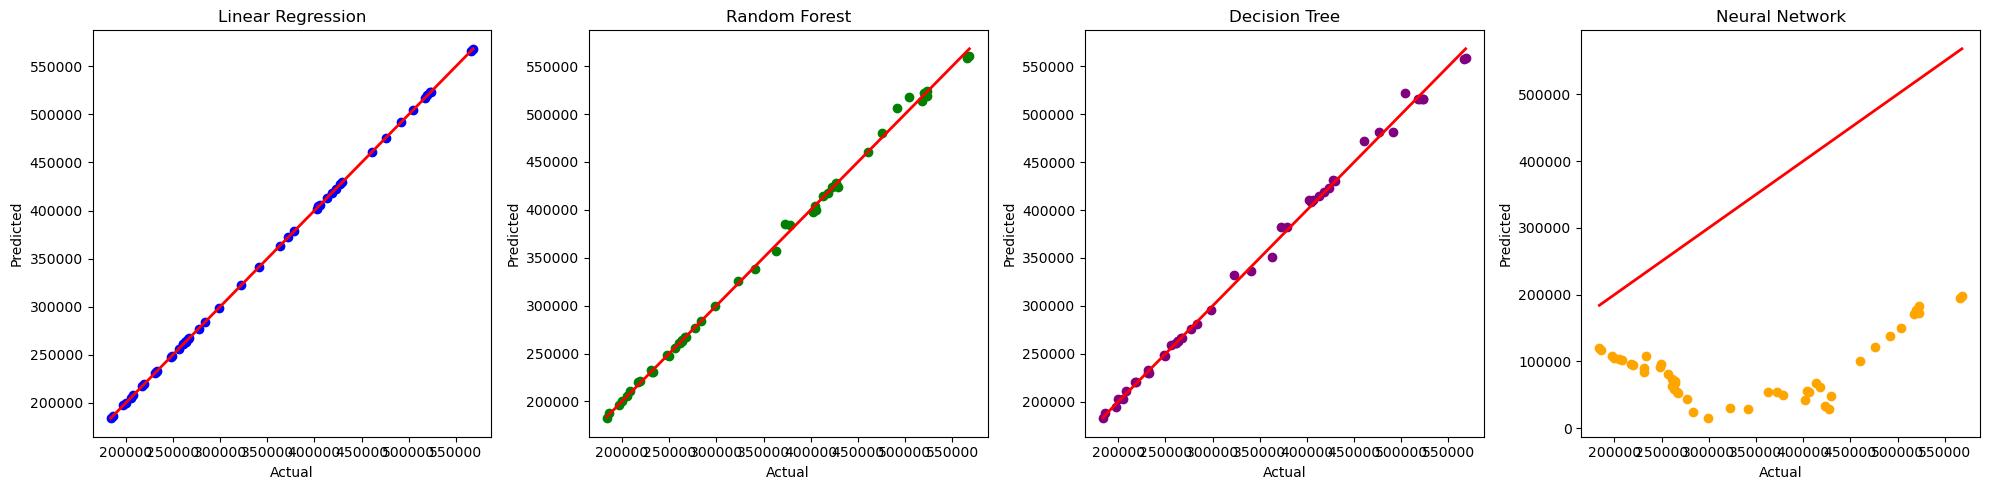

In [6]:
# Function to obtain predictions
def get_predictions(model, X_test, model_type='regression'):
    if model_type == 'regression':
        return model.predict(X_test)
    elif model_type == 'neural_network':
        return model.predict(X_test).flatten()  # Flatten the output for consistency
    else:
        raise ValueError("Unsupported model type")

# Initialize models
lr_model = LinearRegression()
lr_model.fit(X_train_ap, y_train_ap)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_ap, y_train_ap)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_ap, y_train_ap)
nn_model_ap = build_nn_model(X_train_ap.shape[1])
nn_model_ap.fit(X_train_ap, y_train_ap, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Get predictions
y_pred_ap_lr = get_predictions(lr_model, X_test_ap)
y_pred_ap_rf = get_predictions(rf_model, X_test_ap)
y_pred_ap_dt = get_predictions(dt_model, X_test_ap)
y_pred_ap_nn = get_predictions(nn_model_ap, X_test_ap, model_type='neural_network')

# Plotting Predictions vs Actuals
plt.figure(figsize=(20, 5))

# Linear Regression
plt.subplot(1, 4, 1)
plt.scatter(y_test_ap, y_pred_ap_lr, color='blue')
plt.plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Random Forest
plt.subplot(1, 4, 2)
plt.scatter(y_test_ap, y_pred_ap_rf, color='green')
plt.plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# Decision Tree
plt.subplot(1, 4, 3)
plt.scatter(y_test_ap, y_pred_ap_dt, color='purple')
plt.plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Neural Network
plt.subplot(1, 4, 4)
plt.scatter(y_test_ap, y_pred_ap_nn, color='orange')
plt.plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network')

plt.tight_layout()
plt.show()


# Models and Results:

Multiple Linear Regression:
MSE (Mean Squared Error): 3903.93
R² (Coefficient of Determination): 0.99999971
Interpretation: The linear regression model achieved an exceptionally low MSE and an extremely high R², indicating it predicts the apartment benchmark values with very high accuracy. This model is highly effective for this dataset, explaining almost all the variance in the target variable.

Random Forest Regressor:
MSE: 19,762,973.04
R²: 0.99852134
Interpretation: The Random Forest model's MSE is significantly higher than that of the linear regression model, suggesting potential overfitting or misalignment with the dataset’s characteristics. Although it still explains a high proportion of the variance, it is less effective compared to the linear regression model.

Decision Tree Regressor:
MSE: 30,244,042.55
R²: 0.99773715
Interpretation: Similar to the Random Forest, the Decision Tree model also shows a high MSE, indicating possible overfitting or excessive complexity. While it performs well, it is not as effective as the linear regression model in this case.

Neural Network:
MAE (Mean Absolute Error): 261,108.69
Interpretation: The neural network model's MAE is higher compared to the MSE of the other models, indicating that it has larger typical errors. This suggests that the neural network may need further tuning or may not be as well-suited for this particular prediction task.

Conclusion:
The Multiple Linear Regression model is the most accurate and effective model for predicting the Apartment Benchmark SA in this dataset, given its very low MSE and high R². The Random Forest and Decision Tree models, while still performing well, have higher MSE values, suggesting potential overfitting. The Neural Network model shows the largest errors on average, indicating that further optimization may be necessary.